### Car_Price_Prediciton

### Problem Statement


With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase:

#### Data Collection Phase : 
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. more the data better the model. In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number ofcolumns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.

#### Model Building Phase : 
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like.

##### Data Cleaning
##### Exploratory Data Analysis
##### Data Pre-processing
##### Model Building
##### Model Evaluation
##### Selecting the best model

In [163]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [164]:
car=pd.read_csv("cardekho.csv")
car

0                            Brand                Model       Price  \
0        0                  2016 Honda City            i VTEC VX   7.22 Lakh   
1        1                 2018 Hyundai i20             1.2 Asta   6.51 Lakh   
2        2                 2018 Honda Amaze             S i-VTEC   5.83 Lakh   
3        3                  2015 Honda City             i VTEC V   5.91 Lakh   
4        4               2016 Maruti Baleno            1.2 Alpha   5.74 Lakh   
...    ...                              ...                  ...         ...   
5138  5138               2022 Tata Nexon EV          XZ Plus LUX  17.50 Lakh   
5139  5139                2010 Maruti Swift             ZXi BSIV   3.30 Lakh   
5140  5140  2017 Mahindra Bolero Power Plus                  ZLX   6.05 Lakh   
5141  5141                 2017 Ford Aspire  1.2 Ti-VCT Titanium   4.80 Lakh   
5142  5142              2016 Maruti Celerio                  VDi   3.75 Lakh   

          Fuel    Variant    KMS_driven  
0       Petrol     Manual    31,499 kms  
1       Petrol     Manual    43,143 kms  
2       Petrol     Manual    32,480 kms  
3       Petrol     Manual    38,387 kms  
4       Petrol     Manual    75,915 kms  
...        ...        ...           ...  
5138  Electric  Automatic    64,630 kms  
5139    Petrol     Manual  1,02,321 kms  
5140    Diesel     Manual    88,321 kms  
5141    Petrol     Manual    65,321 kms  
5142    Diesel     Manual    90,000 kms  

[5143 rows x 7 columns]

In [167]:
# Checking shape of my dataset
car.shape

(5143, 7)

In [168]:
car.columns

Index(['0', 'Brand', 'Model', 'Price', 'Fuel', 'Variant', 'KMS_driven'], dtype='object')

In [169]:
car.dtypes

0              int64
Brand         object
Model         object
Price         object
Fuel          object
Variant       object
KMS_driven    object
dtype: object

In [170]:
car['Price']

0        7.22 Lakh
1        6.51 Lakh
2        5.83 Lakh
3        5.91 Lakh
4        5.74 Lakh
           ...    
5138    17.50 Lakh
5139     3.30 Lakh
5140     6.05 Lakh
5141     4.80 Lakh
5142     3.75 Lakh
Name: Price, Length: 5143, dtype: object

In [171]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   0           5143 non-null   int64 
 1   Brand       5143 non-null   object
 2   Model       5143 non-null   object
 3   Price       5143 non-null   object
 4   Fuel        5143 non-null   object
 5   Variant     5143 non-null   object
 6   KMS_driven  5143 non-null   object
dtypes: int64(1), object(6)
memory usage: 281.4+ KB


In [172]:
# Value counts of each column.
for i in car.columns:
        print(car[i].value_counts())
        print('****************************************')
        

0       1
3376    1
3434    1
3433    1
3432    1
       ..
1713    1
1712    1
1711    1
1710    1
5142    1
Name: 0, Length: 5143, dtype: int64
****************************************
2015 Honda City           51
2018 Hyundai Creta        49
2017 Hyundai Creta        46
2017 Maruti Baleno        44
2017 Hyundai Grand i10    41
                          ..
2010 Maruti Zen Estilo     1
2019 Audi Q3               1
2012 Chevrolet Spark       1
2021 Mahindra XUV500       1
2022 Tata Nexon EV         1
Name: Brand, Length: 1045, dtype: int64
****************************************
VXI                             148
LXI                              87
Sportz                           65
VDI                              59
Magna                            48
                               ... 
1.5 Revotorq XM                   1
TD4 HSE                           1
XL 85 PS                          1
1.5 TDI Highline AT 16 Alloy      1
1.2 Ti-VCT Titanium               1
Name: Model, Leng

#### Data Extraction

In [173]:
# Extracting 'Price' values from Price
car['Price'] = car['Price'].str.split().str[0]
car

0                            Brand                Model  Price  \
0        0                  2016 Honda City            i VTEC VX   7.22   
1        1                 2018 Hyundai i20             1.2 Asta   6.51   
2        2                 2018 Honda Amaze             S i-VTEC   5.83   
3        3                  2015 Honda City             i VTEC V   5.91   
4        4               2016 Maruti Baleno            1.2 Alpha   5.74   
...    ...                              ...                  ...    ...   
5138  5138               2022 Tata Nexon EV          XZ Plus LUX  17.50   
5139  5139                2010 Maruti Swift             ZXi BSIV   3.30   
5140  5140  2017 Mahindra Bolero Power Plus                  ZLX   6.05   
5141  5141                 2017 Ford Aspire  1.2 Ti-VCT Titanium   4.80   
5142  5142              2016 Maruti Celerio                  VDi   3.75   

          Fuel    Variant    KMS_driven  
0       Petrol     Manual    31,499 kms  
1       Petrol     Manual    43,143 kms  
2       Petrol     Manual    32,480 kms  
3       Petrol     Manual    38,387 kms  
4       Petrol     Manual    75,915 kms  
...        ...        ...           ...  
5138  Electric  Automatic    64,630 kms  
5139    Petrol     Manual  1,02,321 kms  
5140    Diesel     Manual    88,321 kms  
5141    Petrol     Manual    65,321 kms  
5142    Diesel     Manual    90,000 kms  

[5143 rows x 7 columns]

In [174]:
# Extracting 'KMS_driven' from KMS_driven
car['KMS_driven'] = car['KMS_driven'].str.split().str[0]
car

0                            Brand                Model  Price  \
0        0                  2016 Honda City            i VTEC VX   7.22   
1        1                 2018 Hyundai i20             1.2 Asta   6.51   
2        2                 2018 Honda Amaze             S i-VTEC   5.83   
3        3                  2015 Honda City             i VTEC V   5.91   
4        4               2016 Maruti Baleno            1.2 Alpha   5.74   
...    ...                              ...                  ...    ...   
5138  5138               2022 Tata Nexon EV          XZ Plus LUX  17.50   
5139  5139                2010 Maruti Swift             ZXi BSIV   3.30   
5140  5140  2017 Mahindra Bolero Power Plus                  ZLX   6.05   
5141  5141                 2017 Ford Aspire  1.2 Ti-VCT Titanium   4.80   
5142  5142              2016 Maruti Celerio                  VDi   3.75   

          Fuel    Variant KMS_driven  
0       Petrol     Manual     31,499  
1       Petrol     Manual     43,143  
2       Petrol     Manual     32,480  
3       Petrol     Manual     38,387  
4       Petrol     Manual     75,915  
...        ...        ...        ...  
5138  Electric  Automatic     64,630  
5139    Petrol     Manual   1,02,321  
5140    Diesel     Manual     88,321  
5141    Petrol     Manual     65,321  
5142    Diesel     Manual     90,000  

[5143 rows x 7 columns]

In [175]:
# Extracting Manufacturing Year from Brand
car['Manuf_Year'] = car['Brand'].str.split().str[0]
car['Brand'] = car['Brand'].str.split().str[1]
car

0     Brand                Model  Price      Fuel    Variant  \
0        0     Honda            i VTEC VX   7.22    Petrol     Manual   
1        1   Hyundai             1.2 Asta   6.51    Petrol     Manual   
2        2     Honda             S i-VTEC   5.83    Petrol     Manual   
3        3     Honda             i VTEC V   5.91    Petrol     Manual   
4        4    Maruti            1.2 Alpha   5.74    Petrol     Manual   
...    ...       ...                  ...    ...       ...        ...   
5138  5138      Tata          XZ Plus LUX  17.50  Electric  Automatic   
5139  5139    Maruti             ZXi BSIV   3.30    Petrol     Manual   
5140  5140  Mahindra                  ZLX   6.05    Diesel     Manual   
5141  5141      Ford  1.2 Ti-VCT Titanium   4.80    Petrol     Manual   
5142  5142    Maruti                  VDi   3.75    Diesel     Manual   

     KMS_driven Manuf_Year  
0        31,499       2016  
1        43,143       2018  
2        32,480       2018  
3        38,387       2015  
4        75,915       2016  
...         ...        ...  
5138     64,630       2022  
5139   1,02,321       2010  
5140     88,321       2017  
5141     65,321       2017  
5142     90,000       2016  

[5143 rows x 8 columns]

In [176]:
# Converting object data type columns to float data type
car = car.astype({'Price':'float', 'Manuf_Year':'int'})

In [177]:
car.dtypes

0               int64
Brand          object
Model          object
Price         float64
Fuel           object
Variant        object
KMS_driven     object
Manuf_Year      int32
dtype: object

In [178]:
car.isnull().sum()

0             0
Brand         0
Model         0
Price         0
Fuel          0
Variant       0
KMS_driven    0
Manuf_Year    0
dtype: int64

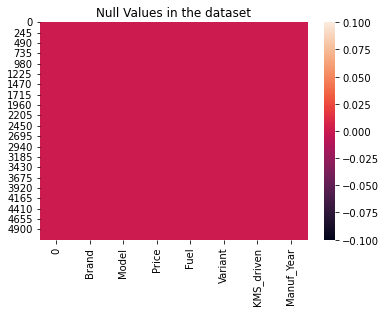

In [179]:
# Visualizing null values in the dataset
sns.heatmap(car.isnull())
plt.title("Null Values in the dataset")
plt.show()

In [180]:
car.describe()

0         Price   Manuf_Year
count  5143.000000   5143.000000  5143.000000
mean   2571.000000    394.294083  2015.842504
std    1484.800548   5365.912722     3.419589
min       0.000000      1.000000  1990.000000
25%    1285.500000      4.200000  2014.000000
50%    2571.000000      6.370000  2016.000000
75%    3856.500000     11.450000  2018.000000
max    5142.000000  99000.000000  2022.000000

In [181]:
#Checking for empty observations in target column
car.loc[car['Price'] == " "]

Empty DataFrame
Columns: [0, Brand, Model, Price, Fuel, Variant, KMS_driven, Manuf_Year]
Index: []

No empty observation

### Data Visualization

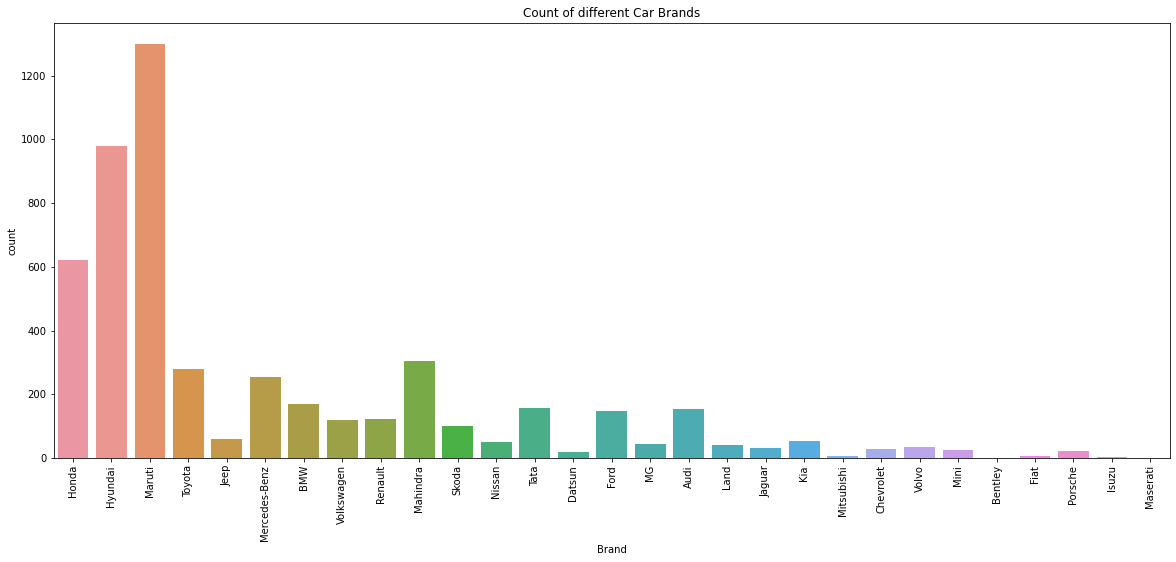

In [182]:
plt.figure(figsize=(20,8))
sns.countplot(car["Brand"])
plt.title("Count of different Car Brands")
plt.xticks(rotation=90)
plt.show()

Hyundai,Maruti,Honda,Renault,Mahindra,Toyoto are most used cars



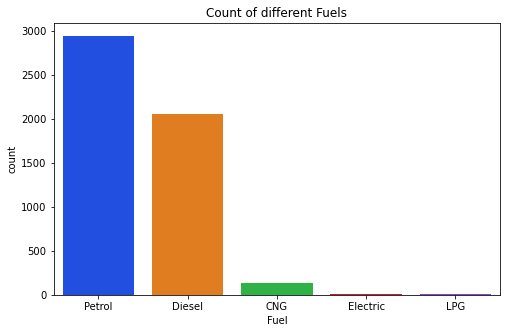

In [183]:
plt.figure(figsize=(8,5))
sns.countplot(car["Fuel"],palette='bright')
plt.title("Count of different Fuels")
plt.show()

The major type of fuel is petrol followed by diesel



Manual       3506
Automatic    1637
Name: Variant, dtype: int64


<AxesSubplot:ylabel='Variant'>

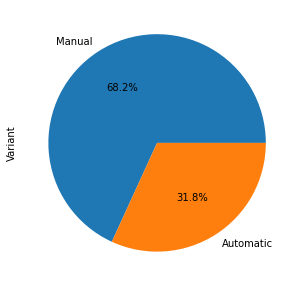

In [184]:
plt.figure(figsize=(10,5))
print(car['Variant'].value_counts())
car['Variant'].value_counts().plot.pie(autopct='%1.1f%%')

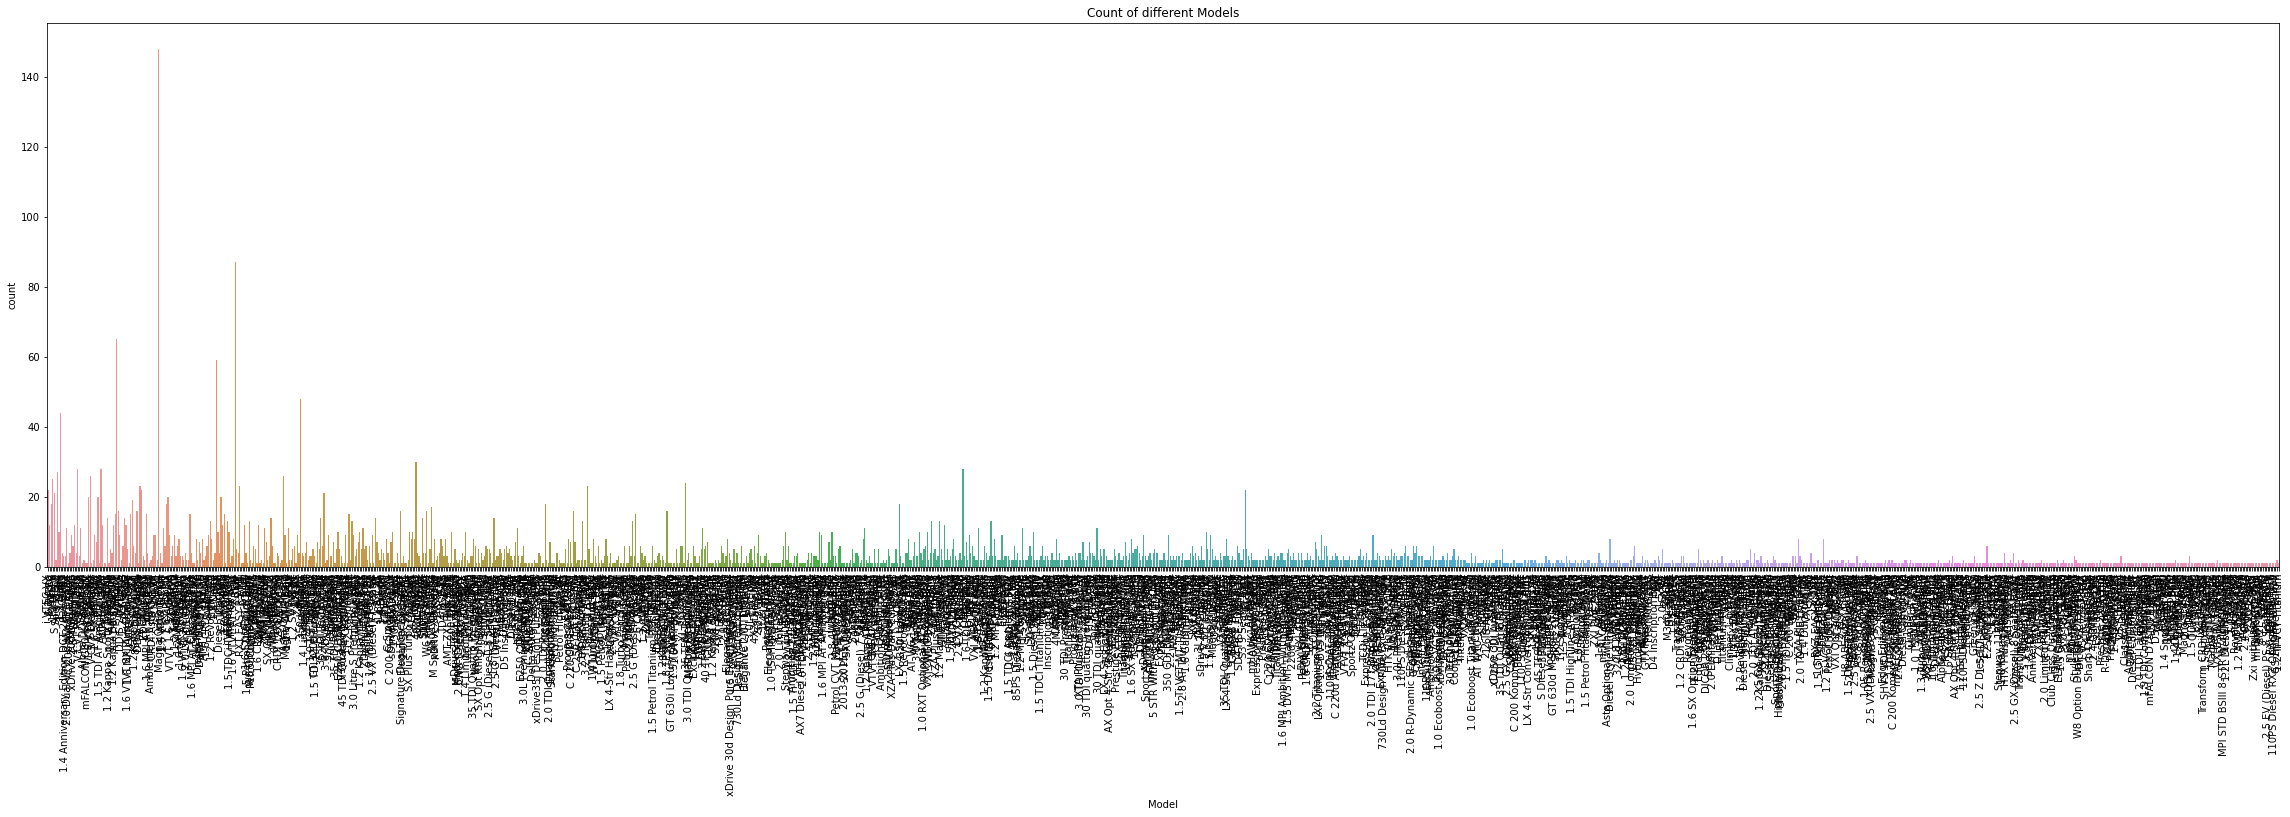

In [185]:
plt.figure(figsize=[40,10])
sns.countplot(car['Model'])
plt.title("Count of different Models")
plt.xticks(rotation=90)
plt.show()

The count of VXI, LXI, VXI BS IV, 1.2 Delta & 1.2 Alpha are highest among all the models.


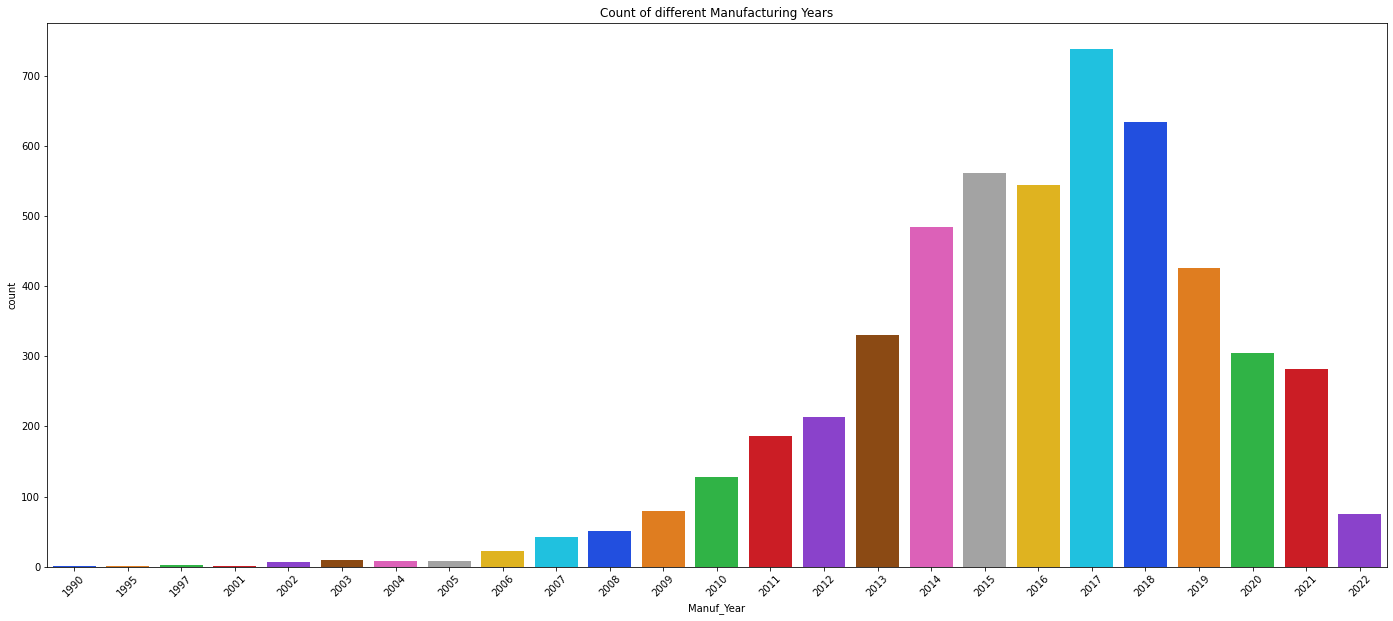

In [186]:
plt.figure(figsize=[24,10])
sns.countplot(car['Manuf_Year'],palette='bright')
plt.title("Count of different Manufacturing Years")
plt.xticks(rotation=45)
plt.show()

Most of the used cars are manufactured in 2018,2020,2019,2017,2015,2021



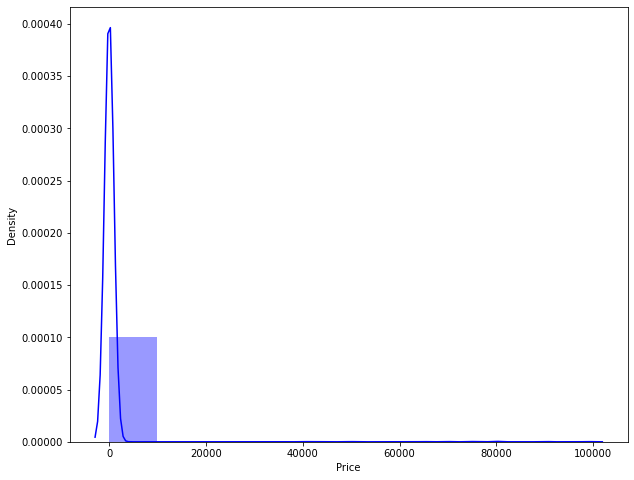

In [187]:
plt.figure(figsize=(10,8))
sns.distplot(car["Price"],bins=10,color='Blue')
plt.show()

### BIVARIATE ANALYSIS

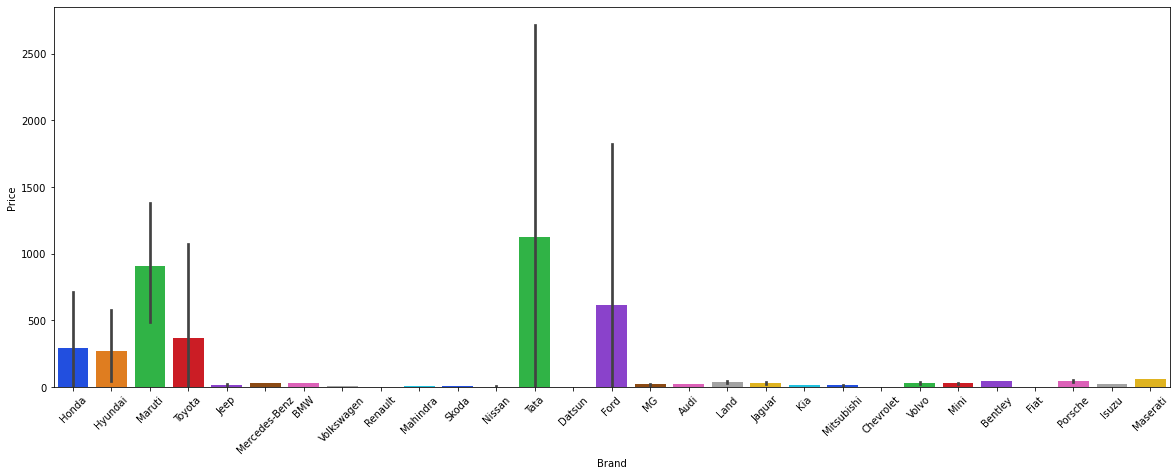

In [188]:
plt.figure(figsize=(20,7))
sns.barplot(x='Brand',y='Price',data=car,palette='bright')
plt.xticks(rotation=45)
plt.show();

PRICE VS BRAND: Most of the used cars are of the Tata Brand. 


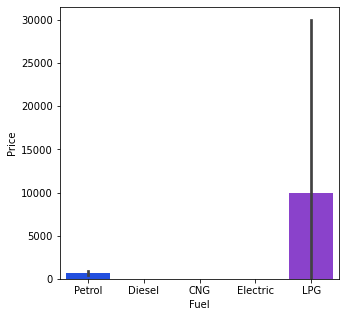

In [189]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel',y='Price',data=car,palette='bright')
plt.show();

PRICEVSFUEL:Most of the used car are LPG followed by petrol



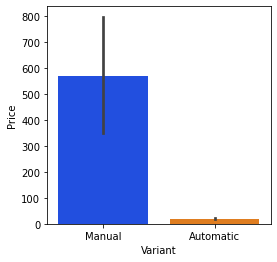

In [190]:
plt.figure(figsize=(4,4))
sns.barplot(x='Variant',y='Price',data=car,palette='bright')
plt.show();

Most of the used cars are Manual followed by Automatic



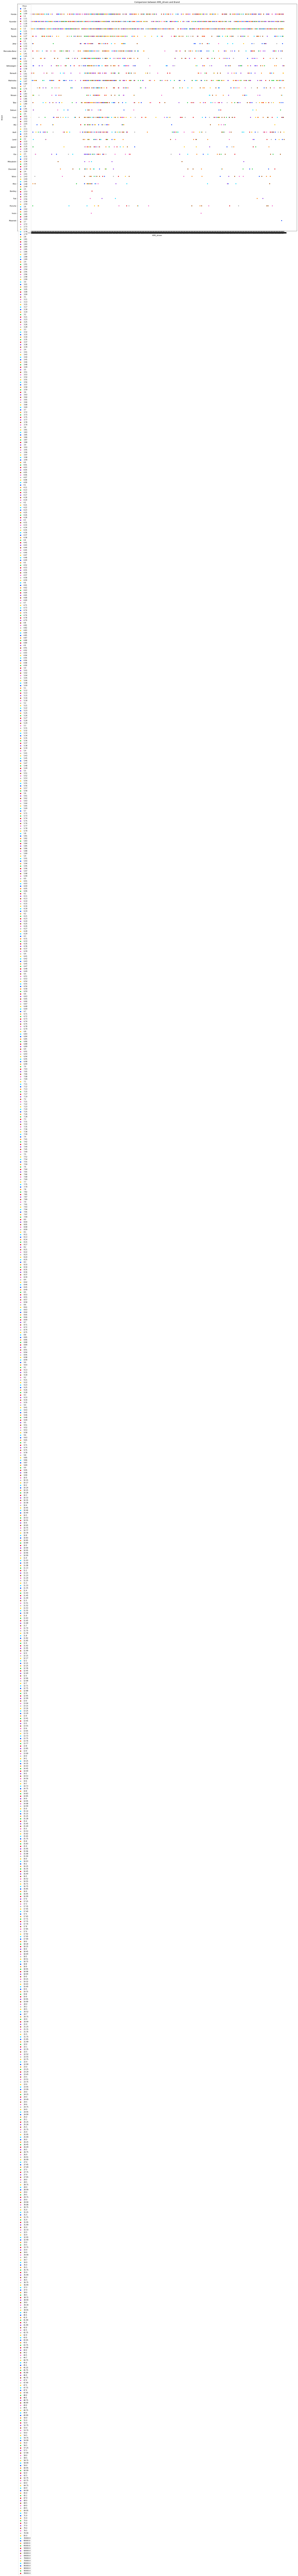

In [191]:
plt.figure(figsize=[30,25])
plt.title('Comparision between KMS_driven and Brand')
sns.scatterplot(car['KMS_driven'],car['Brand'],hue=car['Price'],palette="bright");

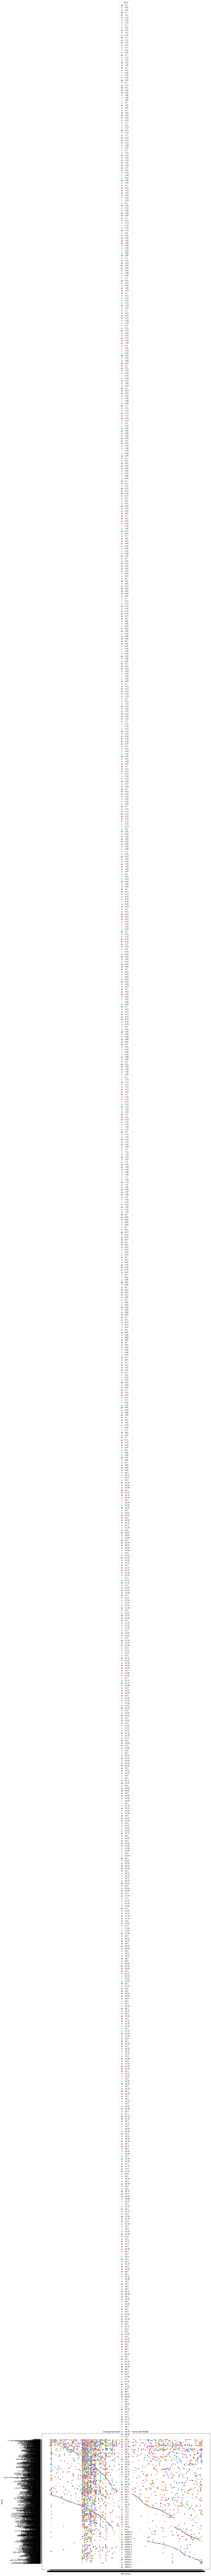

In [192]:
plt.figure(figsize=[18,15])
plt.title('Comparision between KMS_driven and Model')
sns.scatterplot(car['KMS_driven'],car['Model'],hue=car['Price'],palette="bright");

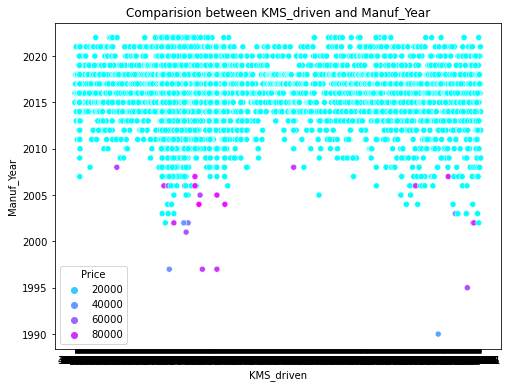

In [193]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Manuf_Year')
sns.scatterplot(car['KMS_driven'],car['Manuf_Year'],hue=car['Price'],palette="cool");

The above visualization shows the relationship between KMS_driven and Manuf_Year in terms of Price. Most of the car's manufacturing years are between 2015 & 2020. There are outliers present in the Manuf_Year column. Manuf_Year is positively correlated with our target Price.

sns.pairplot(df_uc,hue="Price",palette="Spectral") plt.show()

#### Encoding

In [194]:
car.columns


Index(['0', 'Brand', 'Model', 'Price', 'Fuel', 'Variant', 'KMS_driven',
       'Manuf_Year'],
      dtype='object')

In [195]:
car.dtypes


0               int64
Brand          object
Model          object
Price         float64
Fuel           object
Variant        object
KMS_driven     object
Manuf_Year      int32
dtype: object

In [196]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [197]:
car['Brand'] = le.fit_transform(car['Brand'])
car['Model'] = le.fit_transform(car['Model'])
car['KMS_driven'] = le.fit_transform(car['KMS_driven'])
car['Fuel'] = le.fit_transform(car['Fuel'])
car['Variant'] = le.fit_transform(car['Variant'])

In [198]:
car

0  Brand  Model  Price  Fuel  Variant  KMS_driven  Manuf_Year
0        0      7   1382   7.22     4        1         448        2016
1        1      8     35   6.51     4        1         674        2018
2        2      7   1016   5.83     4        1         469        2018
3        3      7   1381   5.91     4        1         568        2015
4        4     16     34   5.74     4        1        1173        2016
...    ...    ...    ...    ...   ...      ...         ...         ...
5138  5138     25   1312  17.50     2        0        1009        2022
5139  5139     16   1355   3.30     4        1          13        2010
5140  5140     15   1334   6.05     1        1        1325        2017
5141  5141      6     96   4.80     4        1        1021        2017
5142  5142     16   1176   3.75     1        1        1349        2016

[5143 rows x 8 columns]

#### Outliers

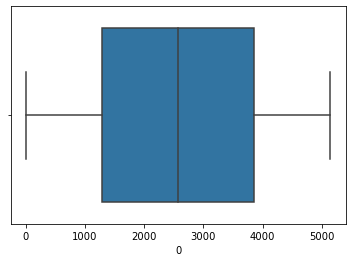

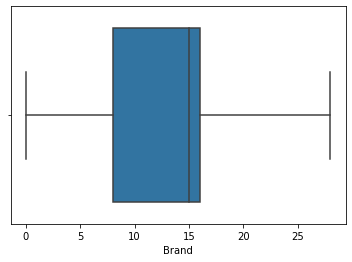

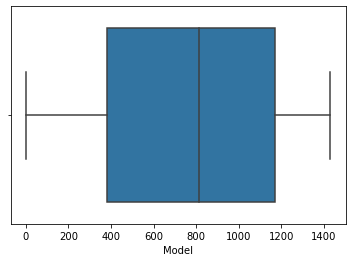

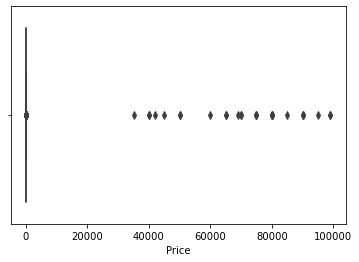

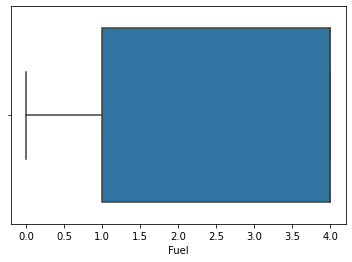

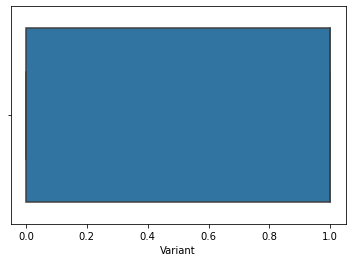

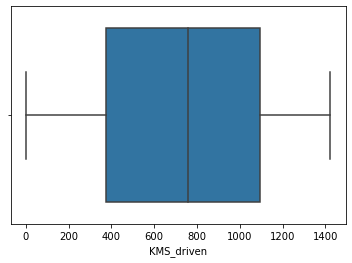

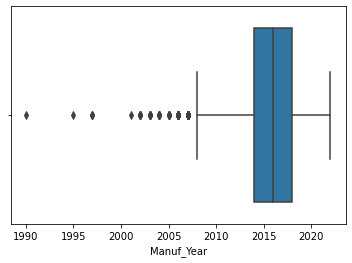

In [199]:
for i in car.columns:
    sns.boxplot(car[i])
    plt.show()

We can see outliers present in the columns : "Brand", "Price", "Variant" & "Manuf_Year". Since Price is our target variable we shall not remove outliers from this column.



### REMOVING OUTLIERS


In [200]:
df_outliers=car[["Brand", "Variant", "Manuf_Year"]]


In [201]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_usedcars=car[(z<3).all(axis=1)]
df_usedcars

0  Brand  Model  Price  Fuel  Variant  KMS_driven  Manuf_Year
0        0      7   1382   7.22     4        1         448        2016
1        1      8     35   6.51     4        1         674        2018
2        2      7   1016   5.83     4        1         469        2018
3        3      7   1381   5.91     4        1         568        2015
4        4     16     34   5.74     4        1        1173        2016
...    ...    ...    ...    ...   ...      ...         ...         ...
5138  5138     25   1312  17.50     2        0        1009        2022
5139  5139     16   1355   3.30     4        1          13        2010
5140  5140     15   1334   6.05     1        1        1325        2017
5141  5141      6     96   4.80     4        1        1021        2017
5142  5142     16   1176   3.75     1        1        1349        2016

[5105 rows x 8 columns]

In [202]:
df_usedcars.shape

(5105, 8)

In [203]:
car.shape

(5143, 8)

In [204]:
Data_loss=((480-480)/480)*100
Data_loss

0.0

dataloss is 0%



#### SKEWNESS


In [205]:
df_usedcars.skew()


0              0.007021
Brand          0.211170
Model         -0.181788
Price         22.824157
Fuel          -0.326933
Variant       -0.773515
KMS_driven    -0.110589
Manuf_Year    -0.519459
dtype: float64

In [206]:
df_skew=['Fuel','Variant']

In [207]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [208]:
df_usedcars[df_skew] = scaler.fit_transform(df_usedcars[df_skew].values)

In [209]:
df_usedcars[df_skew].skew()

Fuel      -0.324169
Variant   -0.773515
dtype: float64

### CORRELATION

In [210]:
df_usedcars.corr()

0     Brand     Model     Price      Fuel   Variant  \
0           1.000000  0.028650  0.017169  0.022165 -0.088374  0.117525   
Brand       0.028650  1.000000 -0.031112  0.012483 -0.062853  0.067351   
Model       0.017169 -0.031112  1.000000  0.020285  0.013255  0.099792   
Price       0.022165  0.012483  0.020285  1.000000  0.038439  0.029297   
Fuel       -0.088374 -0.062853  0.013255  0.038439  1.000000  0.117100   
Variant     0.117525  0.067351  0.099792  0.029297  0.117100  1.000000   
KMS_driven  0.041353  0.013034  0.008416 -0.011327 -0.019024 -0.017054   
Manuf_Year -0.103723  0.059606  0.033724 -0.123137  0.009420 -0.154291   

            KMS_driven  Manuf_Year  
0             0.041353   -0.103723  
Brand         0.013034    0.059606  
Model         0.008416    0.033724  
Price        -0.011327   -0.123137  
Fuel         -0.019024    0.009420  
Variant      -0.017054   -0.154291  
KMS_driven    1.000000    0.024559  
Manuf_Year    0.024559    1.000000

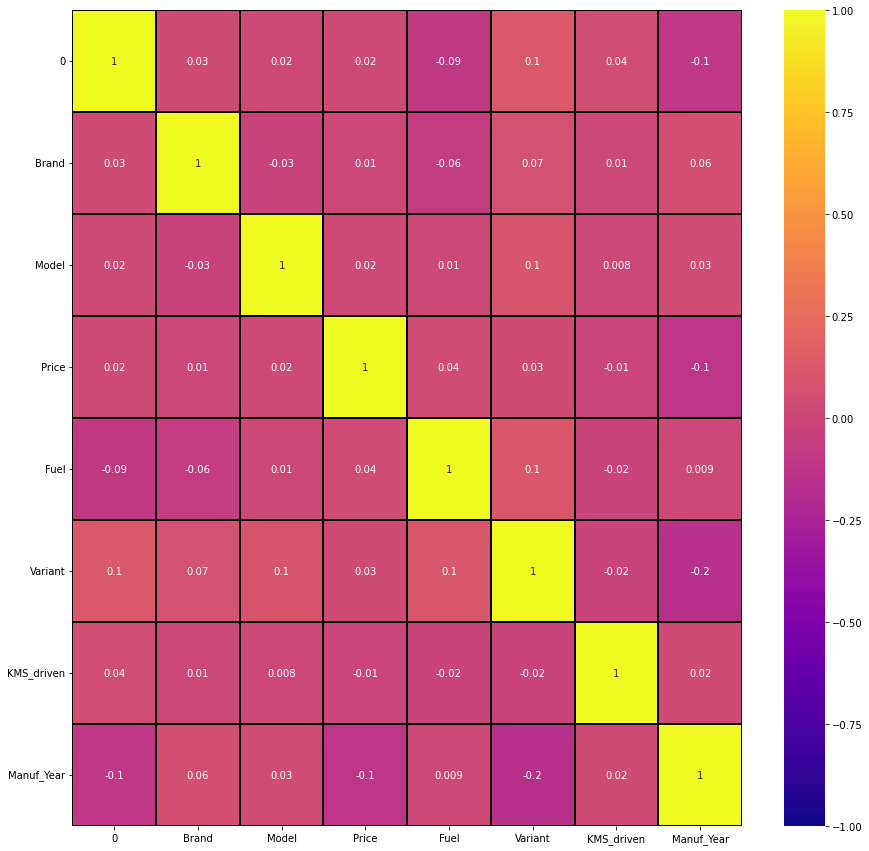

In [211]:
# Visualizing the correlation matrix by plotting heatmap for train dataset.
plt.figure(figsize=(15,15))
sns.heatmap(df_usedcars.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="plasma")
plt.yticks(rotation=0);

From the above correlation map, we see that the columns, Variant & Fuel are highly neagtively correlated with our target Price. The column Manuf_Year is highly positively correlated with our target.

We can clearly observe a multicolinearity issue in some of the features of test dataset so we have to check VIF.

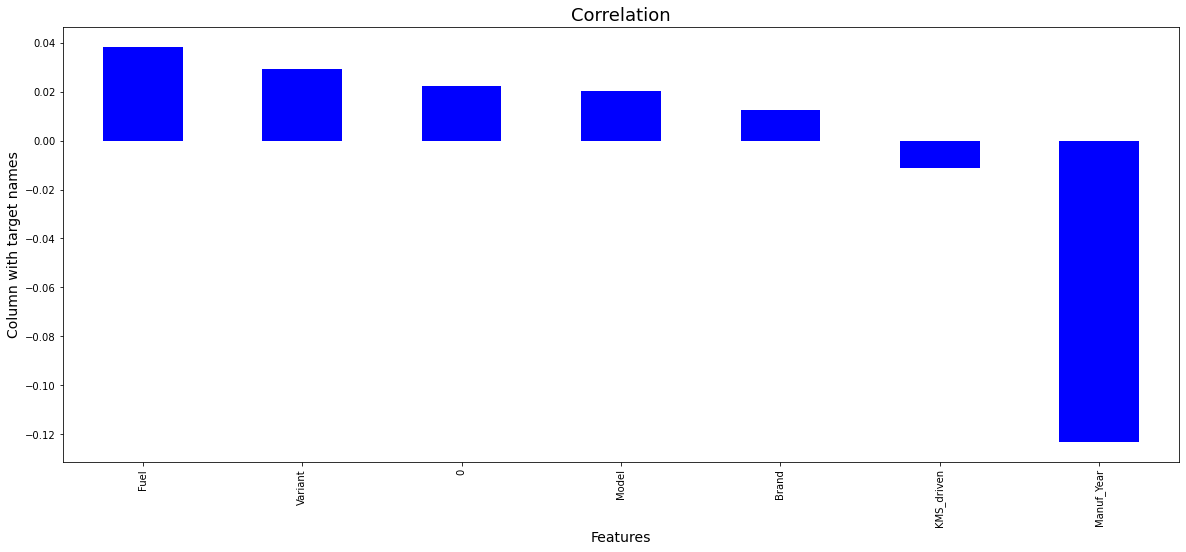

In [212]:
plt.figure(figsize=(20,8))
df_usedcars.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [213]:
x = df_usedcars.drop("Price",axis=1)
y = df_usedcars["Price"]

In [214]:
x.shape


(5105, 7)

In [215]:
y.shape


(5105,)

#### SCALING

In [216]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

0     Brand     Model      Fuel   Variant  KMS_driven  Manuf_Year
0    -1.729346 -0.898420  1.445481  0.862999  0.685500   -0.680599    0.017785
1    -1.728670 -0.758003 -1.694048  0.862999  0.685500   -0.134786    0.639664
2    -1.727994 -0.898420  0.592424  0.862999  0.685500   -0.629882    0.639664
3    -1.727318 -0.898420  1.443151  0.862999  0.685500   -0.390787   -0.293154
4    -1.726642  0.365331 -1.696378  0.862999  0.685500    1.070350    0.017785
...        ...       ...       ...       ...       ...         ...         ...
5100  1.743830  1.629082  1.282328 -0.463142 -1.458788    0.674273    1.883421
5101  1.744506  0.365331  1.382551  0.862999  0.685500   -1.731168   -1.847850
5102  1.745182  0.224914  1.333605 -1.113285  0.685500    1.437445    0.328725
5103  1.745858 -1.038836 -1.551872  0.862999  0.685500    0.703254    0.328725
5104  1.746534  0.365331  0.965345 -1.113285  0.685500    1.495408    0.017785

[5105 rows x 7 columns]

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values    Features
0    1.034955           0
1    1.017477       Brand
2    1.014572       Model
3    1.030660        Fuel
4    1.073264     Variant
5    1.003256  KMS_driven
6    1.042056  Manuf_Year

### BEST RANDOM STATE

In [220]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [219]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.3896424288803022  on Random State : 114


In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [222]:
x_train.shape

(3573, 7)

In [223]:
x_test.shape

(1532, 7)

In [224]:
y_train.shape

(3573,)

In [225]:
y_test.shape

(1532,)

### LINEAR REGRESSION


In [226]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [227]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  -0.03465461443653517
Mean absolute error:  532.0095797085567
Mean squared error:  4875239.806222455
Root Mean squared error:  2207.9945213298097


In [228]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  -5.850130339084854
Mean absolute error:  379.59851174934727
Mean squared error:  32277465.00227597
Root Mean squared error:  5681.325989791113


In [229]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.3896424288803022
Mean absolute error:  122.8164464751958
Mean squared error:  2875973.76480316
Root Mean squared error:  1695.8696190459807


In [230]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  -0.0008443017512957951
Mean absolute error:  59.59553837653249
Mean squared error:  4715927.336182708
Root Mean squared error:  2171.618598230985


In [231]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

pred_rfr=rfr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rfr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_Score:  -1.5671990204146766
Mean absolute error:  287.0647095300261
Mean squared error:  12096510.932430223
Root Mean squared error:  3478.003871825076


In [232]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_Score:  -2.405290180105303
Mean absolute error:  311.80003603440804
Mean squared error:  16045553.758854022
Root Mean squared error:  4005.6901725987273


Extra trees Regressor

In [233]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

pred_etr=etr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_etr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_etr))
print('Mean squared error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  -1.6895720459886707
Mean absolute error:  252.86794281984334
Mean squared error:  12673126.391504087
Root Mean squared error:  3559.93348133137


XBOOST Regressor

In [234]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

pred_xgb=xgb.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_xgb))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_xgb))
print('Mean squared error: ',mean_squared_error(y_test,pred_xgb))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_Score:  -3.6639219730059462
Mean absolute error:  304.3475928924218
Mean squared error:  21976162.613740385
Root Mean squared error:  4687.873997212423


CROSS validation regressor

In [235]:
from sklearn.model_selection import cross_val_score


In [236]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  0.010040086896029221


In [237]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  -1.1805718546799555


In [238]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.011657188282276087


In [239]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  -0.002286426634758465


In [240]:
scr_rfr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfr.mean())

Cross validation score of this model is:  -0.2004581971848131


In [241]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  0.06728228641041523


In [242]:
scr_etr=cross_val_score(etr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_etr.mean())

Cross validation score of this model is:  -0.39662438419972895


In [243]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  -0.46802720647248197


The highest cross validation score belonmgs to Extra Trees Regressor, followed by Gradient Boosting Regressor & Random Forest Regressor.

The cross validation scores of KNearest Neighbors Regressor, Decision Tree Regressor & Linear Regression Model are negative and are the lowest of all scores

### HYPER METER TUNING


In [244]:
from sklearn.model_selection import GridSearchCV


In [245]:
parameters = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1]}
grid_xgb = GridSearchCV(xgb, param_grid = parameters, cv = 5)

In [246]:
grid_xgb.fit(x_train, y_train)


[15:28:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:28:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:28:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1]})

In [247]:
grid_xgb.best_params_


{'criterion': 'squared_error',
 'max_features': 'auto',
 'n_estimators': 10,
 'n_jobs': -2}

In [248]:
Best_model = XGBRegressor(criterion='mse',max_features='log2',n_jobs=1,n_estimators=10)
Best_model.fit(x_train,y_train)

pred = Best_model.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

[15:40:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


R2_Score:  -3.3123043539987167
Mean absolute error:  281.71743653201867
Mean squared error:  20319358.315151572
Root Mean squared error:  4507.699891868531


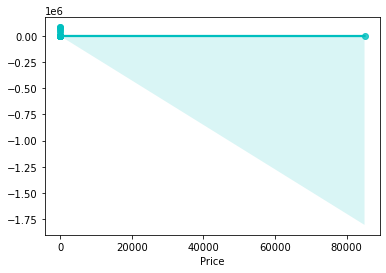

In [249]:
# Visualizing the predicted values
sns.regplot(y_test,pred,color="c")
plt.show()

In [250]:
import joblib
joblib.dump(Best_model,"Used_Car_Price_Prediction.pkl")

['Used_Car_Price_Prediction.pkl']

In [251]:
# Loading the saved model
used_car_model=joblib.load("Used_Car_Price_Prediction.pkl")

# Prediction
prediction = used_car_model.predict(x_test)
prediction

array([ 3.3552206,  6.2919416,  6.981458 , ...,  8.058702 , 19.419127 ,
        8.002809 ], dtype=float32)

In [252]:
pd.DataFrame([used_car_model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])


0         1         2         3         4          5     \
Predicted  3.355221  6.291942  6.981458  8.347623  8.347623  16.105909   
Actual     1.950000  4.950000  4.300000  8.750000  6.750000  15.500000   

               6          7         8          9     ...      1522       1523  \
Predicted  8.578474  22.719208  4.706031  11.277205  ...  7.231867  11.801614   
Actual     9.500000  11.750000  5.470000   6.200000  ...  5.750000  10.490000   

                1524      1525       1526      1527      1528      1529  \
Predicted  14.416482  6.588663  10.064274  4.706031  3.439343  8.058702   
Actual      6.990000  6.450000   5.900000  4.850000  2.480000  7.450000   

                1530      1531  
Predicted  19.419127  8.002809  
Actual     29.990000  9.800000  

[2 rows x 1532 columns]

In [253]:
pd.DataFrame([used_car_model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])


0         1         2         3         4          5     \
Predicted  3.355221  6.291942  6.981458  8.347623  8.347623  16.105909   
Actual     1.950000  4.950000  4.300000  8.750000  6.750000  15.500000   

               6          7         8          9     ...      1522       1523  \
Predicted  8.578474  22.719208  4.706031  11.277205  ...  7.231867  11.801614   
Actual     9.500000  11.750000  5.470000   6.200000  ...  5.750000  10.490000   

                1524      1525       1526      1527      1528      1529  \
Predicted  14.416482  6.588663  10.064274  4.706031  3.439343  8.058702   
Actual      6.990000  6.450000   5.900000  4.850000  2.480000  7.450000   

                1530      1531  
Predicted  19.419127  8.002809  
Actual     29.990000  9.800000  

[2 rows x 1532 columns]